In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("bfi.csv")
df.head()

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,...,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,...,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,...,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,...,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,...,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


In [3]:
df.isnull().sum()

Unnamed: 0      0
A1             16
A2             27
A3             26
A4             19
A5             16
C1             21
C2             24
C3             20
C4             26
C5             16
E1             23
E2             16
E3             25
E4              9
E5             21
N1             22
N2             21
N3             11
N4             36
N5             29
O1             22
O2              0
O3             28
O4             14
O5             20
gender          0
education     223
age             0
dtype: int64

In [4]:
df = df.dropna()

In [5]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi, p = calculate_bartlett_sphericity(df)
print("Chi squared value : ", chi)
print("P value : ", p)

Chi squared value :  17377.99317265737
P value :  0.0


In [6]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_vars, kmo_model = calculate_kmo(df)
print("KMO Model : ", kmo_model)

KMO Model :  0.8378793429475189


In [7]:
from factor_analyzer.factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer()
fa.fit(df)

FactorAnalyzer(rotation_kwargs={})

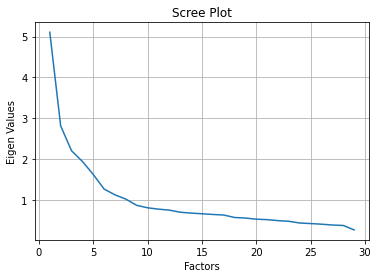

In [8]:
import matplotlib.pyplot as plt
ev, _ = fa.get_eigenvalues()
plt.plot(range(1, df.shape[1]+1), ev)
plt.title("Scree Plot")
plt.xlabel("Factors")
plt.ylabel("Eigen Values")
plt.grid()

In [9]:
loading = pd.DataFrame(fa.loadings_, index = df.columns)
loading

,0,1,2
Unnamed: 0,-0.053051,-0.013375,0.035530
A1,-0.233737,0.079743,0.028746
A2,0.559217,0.060155,0.055566
A3,0.647212,0.033547,0.031983
A4,0.434010,-0.070057,0.016030
A5,0.619661,-0.101364,0.019852
C1,0.004073,0.087325,0.575329
C2,0.055632,0.135663,0.532456
C3,0.062455,-0.007680,0.399205
C4,-0.007680,0.188342,-0.514373


In [10]:
comm = pd.DataFrame(fa.get_communalities(), index = df.columns, columns = ['Communality'])
comm

,Communality
Unnamed: 0,0.004256
A1,0.061818
A2,0.319430
A3,0.421032
A4,0.193529
A5,0.394649
C1,0.338646
C2,0.305009
C3,0.163324
C4,0.300112
